In [27]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import statsmodels.api as sm

In [25]:
from sklearn.datasets import load_boston
boston = load_boston()

In [29]:
dfX0 = pd.DataFrame(boston.data,columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target,columns=['MEDV'])
df = pd.concat([dfX,dfy],axis=1)
model = sm.OLS(dfy,dfX)
result = model.fit()

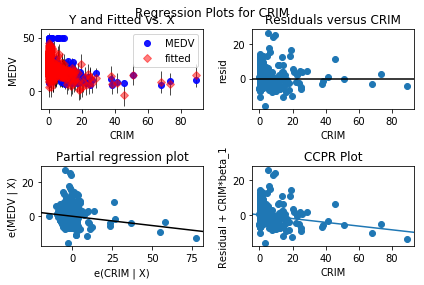

In [30]:
fig = sm.graphics.plot_regress_exog(result,'CRIM')

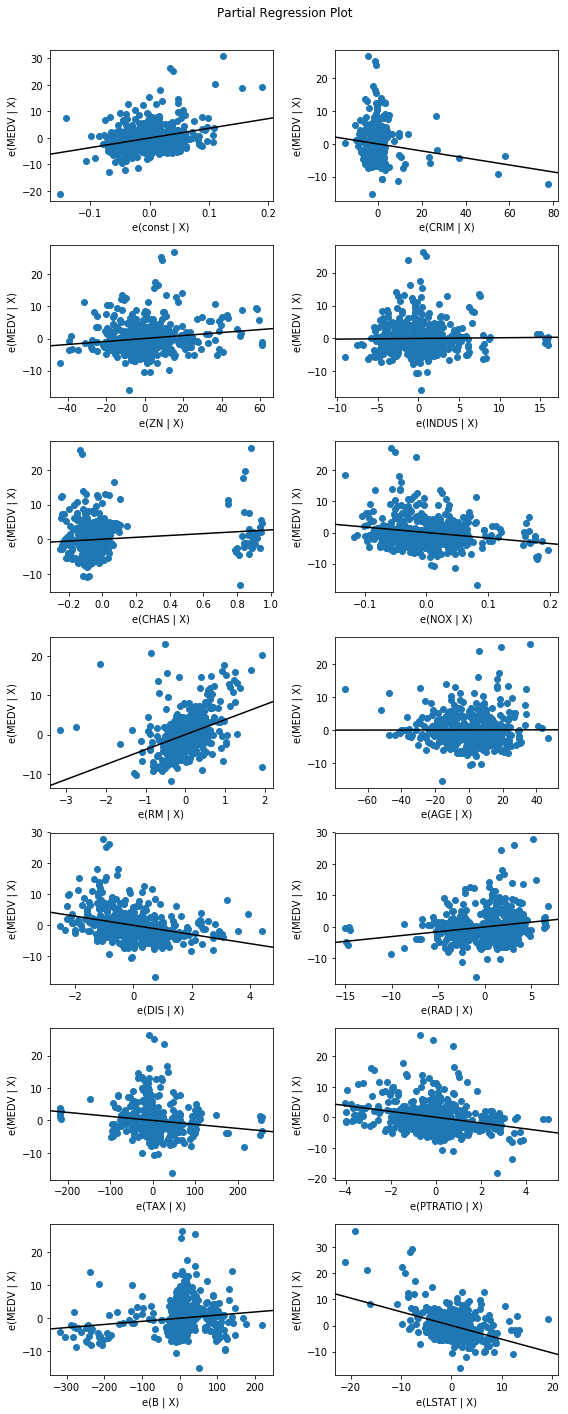

In [36]:
fig=plt.figure(figsize=(8,20))
sm.graphics.plot_partregress_grid(result,fig=fig)
plt.show()

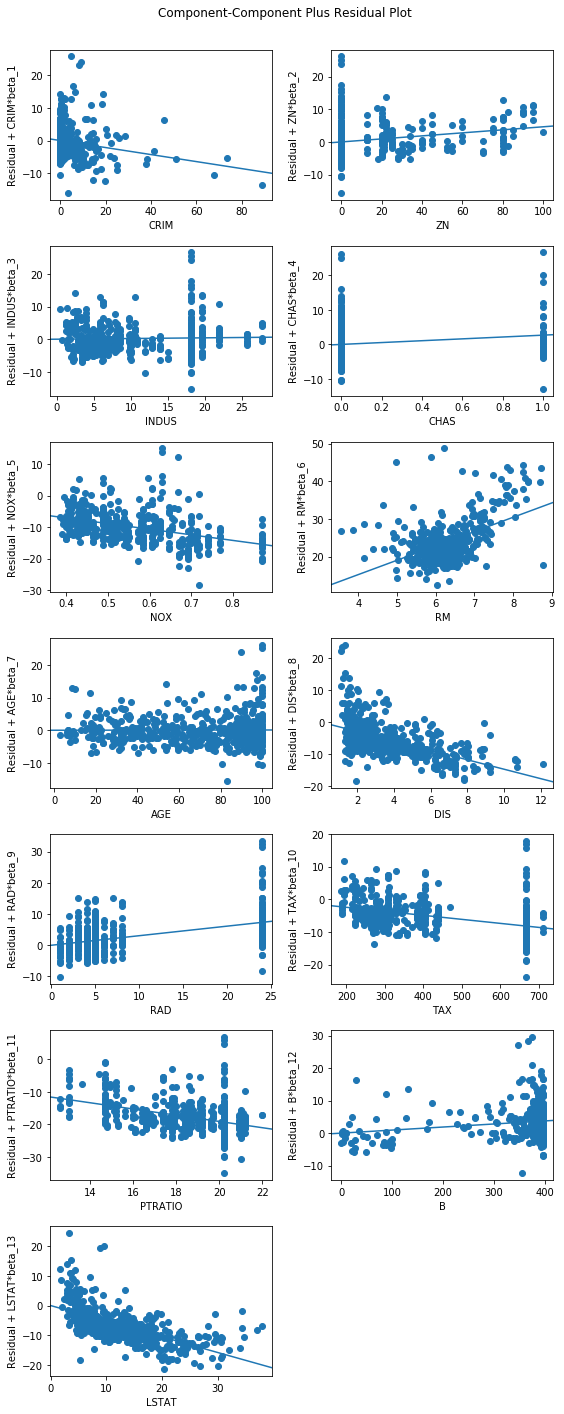

In [39]:
fig = plt.figure(figsize=(8,20))
sm.graphics.plot_ccpr_grid(result,fig=fig)
plt.show()

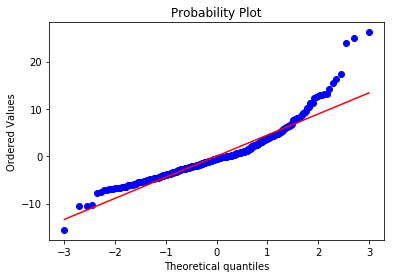

In [43]:
import scipy as sp
sp.stats.probplot(result.resid,plot=plt)
plt.show()

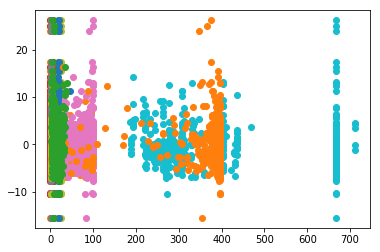

In [50]:
plt.plot(dfX0,result.resid,'o')
plt.show()

In [8]:
from sklearn.datasets import make_regression
import statsmodels.api as sm
import matplotlib.pylab as plt
X0,y,coef = make_regression(n_samples=100,n_features=1,noise=20,coef=True,random_state=1)
X = sm.add_constant(X0)

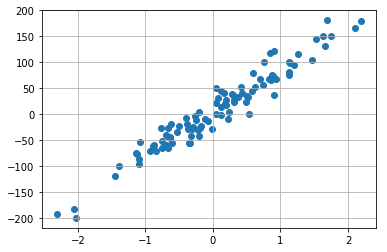

In [10]:
plt.scatter(X0,y)
plt.grid(True)
plt.show()

In [12]:
import pandas as pd
dfx = pd.DataFrame(X)
dfy = pd.DataFrame(y)
model = sm.OLS(dfy,dfx)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     1571.
Date:                Thu, 28 Jun 2018   Prob (F-statistic):           3.89e-62
Time:                        12:18:58   Log-Likelihood:                -432.24
No. Observations:                 100   AIC:                             868.5
Df Residuals:                      98   BIC:                             873.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              4.0540      1.846      2.196      0.0

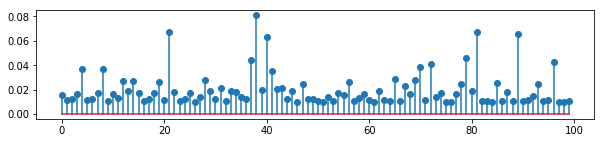

In [13]:
influence = result.get_influence()
hat = influence.hat_matrix_diag
plt.figure(figsize=(10,2))
plt.stem(hat)
plt.show()

In [24]:
import numpy as np
hat.sum()#K
np.average(hat)#K/N = 2/100

0.020000000000000004

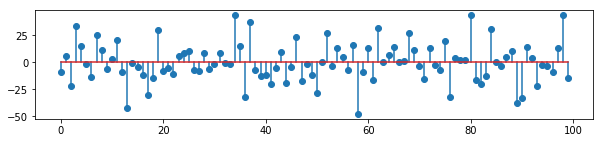

In [16]:
plt.figure(figsize=(10,2))
plt.stem(result.resid)
plt.show()

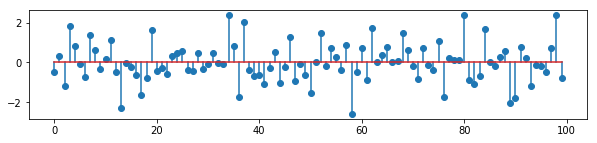

In [17]:
plt.figure(figsize=(10,2))
plt.stem(result.resid_pearson)
plt.show()

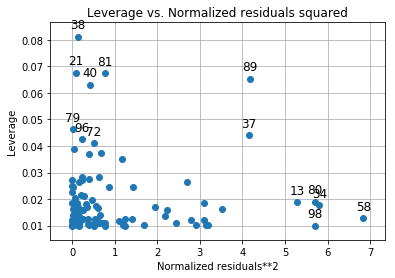

In [21]:
sm.graphics.plot_leverage_resid2(result)
plt.grid(True)
plt.show()

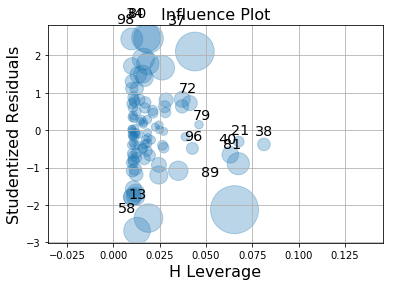

In [20]:
sm.graphics.influence_plot(result,plot_alpha=0.3)
plt.grid(True)
plt.show()